In [2]:
import numpy as np
import basix
import matplotlib.pyplot as plt
from basix import CellType, ElementFamily, LagrangeVariant, LatticeType
import jax_pn
from jax.experimental import sparse
%load_ext autoreload
%autoreload 2

Solving system with shape: (4824, 4824) and 4824 equations.


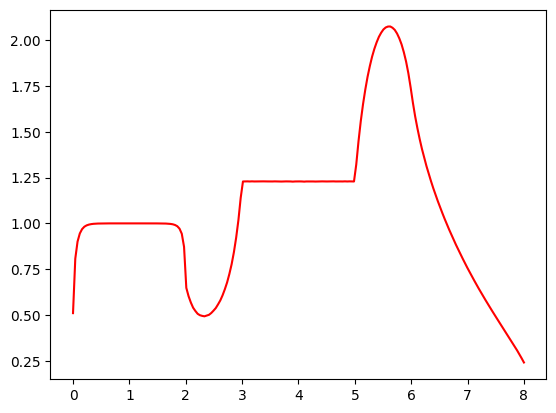

In [5]:
lagrange    = basix.create_element(ElementFamily.P, CellType.interval, degree= 5, lagrange_variant= LagrangeVariant.gll_warped)
N_max = 11
elements_per_cm = 10
regions = [
    (2.0, [10.0], np.array([[[0.0]]]), [10.0]),
    (1.0, [1.0],  np.array([[[0.0]]]),  [0.0]),
    (2.0, [0.0],  np.array([[[0.0]]]),  [0.0]),
    (1.0, [1.0],  np.array([[[0.9]]]), [1.0]),
    (2.0, [1.0],  np.array([[[0.9]]]), [0.0]),
]


dpn_prob = jax_pn.DPN.DPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
pn_prob  = jax_pn.PN.PN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)
adpn_prob = jax_pn.ADPN.ADPN_Problem.from_regions_per_cm(regions, elements_per_cm, N_max, lagrange, L_scat=0)

adpn_prob.Solve_Multigroup_System('vacuum',1)#Assemble_Single_Energy_Group(0,"vacuum")

x = np.linspace(0,8 ,200)
u = adpn_prob.interpolate_solution(x, energy_group = 0, k = 0)

plt.plot(x, u, 'r', label='ADPN')

In [19]:
import jax
import jax.numpy as jnp


def connectivity(conn, i):
    return jnp.array([conn[i, 0], conn[i, 1], conn[i, 2], conn[i, 3]])

connectivity_jit = jax.jit(connectivity, static_argnums= (0,))
connectivity_jit(adpn_prob.jax_elem_dof_matrix, 0)

ValueError: Non-hashable static arguments are not supported. An error occurred while trying to hash an object of type <class 'jaxlib._jax.ArrayImpl'>, [[  0   1  81  82  83  84]
 [  1   2  85  86  87  88]
 [  2   3  89  90  91  92]
 [  3   4  93  94  95  96]
 [  4   5  97  98  99 100]
 [  5   6 101 102 103 104]
 [  6   7 105 106 107 108]
 [  7   8 109 110 111 112]
 [  8   9 113 114 115 116]
 [  9  10 117 118 119 120]
 [ 10  11 121 122 123 124]
 [ 11  12 125 126 127 128]
 [ 12  13 129 130 131 132]
 [ 13  14 133 134 135 136]
 [ 14  15 137 138 139 140]
 [ 15  16 141 142 143 144]
 [ 16  17 145 146 147 148]
 [ 17  18 149 150 151 152]
 [ 18  19 153 154 155 156]
 [ 19  20 157 158 159 160]
 [ 20  21 161 162 163 164]
 [ 21  22 165 166 167 168]
 [ 22  23 169 170 171 172]
 [ 23  24 173 174 175 176]
 [ 24  25 177 178 179 180]
 [ 25  26 181 182 183 184]
 [ 26  27 185 186 187 188]
 [ 27  28 189 190 191 192]
 [ 28  29 193 194 195 196]
 [ 29  30 197 198 199 200]
 [ 30  31 201 202 203 204]
 [ 31  32 205 206 207 208]
 [ 32  33 209 210 211 212]
 [ 33  34 213 214 215 216]
 [ 34  35 217 218 219 220]
 [ 35  36 221 222 223 224]
 [ 36  37 225 226 227 228]
 [ 37  38 229 230 231 232]
 [ 38  39 233 234 235 236]
 [ 39  40 237 238 239 240]
 [ 40  41 241 242 243 244]
 [ 41  42 245 246 247 248]
 [ 42  43 249 250 251 252]
 [ 43  44 253 254 255 256]
 [ 44  45 257 258 259 260]
 [ 45  46 261 262 263 264]
 [ 46  47 265 266 267 268]
 [ 47  48 269 270 271 272]
 [ 48  49 273 274 275 276]
 [ 49  50 277 278 279 280]
 [ 50  51 281 282 283 284]
 [ 51  52 285 286 287 288]
 [ 52  53 289 290 291 292]
 [ 53  54 293 294 295 296]
 [ 54  55 297 298 299 300]
 [ 55  56 301 302 303 304]
 [ 56  57 305 306 307 308]
 [ 57  58 309 310 311 312]
 [ 58  59 313 314 315 316]
 [ 59  60 317 318 319 320]
 [ 60  61 321 322 323 324]
 [ 61  62 325 326 327 328]
 [ 62  63 329 330 331 332]
 [ 63  64 333 334 335 336]
 [ 64  65 337 338 339 340]
 [ 65  66 341 342 343 344]
 [ 66  67 345 346 347 348]
 [ 67  68 349 350 351 352]
 [ 68  69 353 354 355 356]
 [ 69  70 357 358 359 360]
 [ 70  71 361 362 363 364]
 [ 71  72 365 366 367 368]
 [ 72  73 369 370 371 372]
 [ 73  74 373 374 375 376]
 [ 74  75 377 378 379 380]
 [ 75  76 381 382 383 384]
 [ 76  77 385 386 387 388]
 [ 77  78 389 390 391 392]
 [ 78  79 393 394 395 396]
 [ 79  80 397 398 399 400]]. The error was:
TypeError: unhashable type: 'jaxlib._jax.ArrayImpl'


In [ ]:
def fast_flux_right(solution_u):
    return solution_u

We have the following setup:

- A set of design parameters:
$$\theta$$
- A set of state-space variables, $$x$$
- A governing, discretized PDE that takes the form of a linear equation:
$$ A(\theta) x(\theta) = b(\theta) $$
- An objective:
 $$f(x, u)$$

